<a href="https://colab.research.google.com/github/jasonbc94/Data_Science_Projects/blob/main/Whispers_of_the_Machine_A_Binary_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Fiction

Jason Christian

## The Instructions

* Create a story that has a binary outcome (see the Create Story section)
* Create a dataset by running the cells in the Create Dataset section
* Prepare the dataset (see The Data section)
* Run a logistic regression model on your dataset
* Evaluate the model using an accuracy score, a confusion matrix, and a classification report
* Summarize / discuss your findings

## The Story

### My Story

**Whispers of the Machine: A Binary Spark**

**Setting**: Earth, centuries after a colossal electromagnetic pulse (EMP) crippled the planet's technology. Fragile communities have risen from the ashes, relying on salvaged components and forgotten skills to survive. Whispers of the past linger, with deactivated machines serving as haunting reminders of a lost era.

**Disaster**: A series of violent earthquakes cripple the remaining hydro-electric power grids, plunging the largest remaining community, Haven, into darkness and near-freezing temperatures. Food preservation and basic heating become impossible.

**The Binary Choice**: Kai, a young scavenger with a knack for tinkering with salvaged tech, must choose a course of action to restore power to Haven. Option one involves a daring mass migration to the ruins of a long-abandoned tech facility, rumored to hold a backup generator. The other option is to attempt a risky and potentially fatal experiment – repurposing salvaged components to create a rudimentary wind turbine for limited power generation.

**Character Traits and Habits** (0-100 scale or Label/Location):

*   Scavenging Expertise (0-100): The ability to locate and identify useful components from deactivated technology.

*   Engineering Aptitude (0-100): The talent for tinkering and repurposing salvaged tech for new uses.

*   Physical Fitness (0-100): Essential for surviving the harsh environment and navigating the dangers of the abandoned facility.

*   Leadership (0-100): The ability to inspire trust and guide others during a crisis.

*   Knowledge of the Ruins (High/Medium/Low): Understanding the layout and potential dangers of the abandoned facility.

*   Current Location (Haven Center/Haven Outskirts): Central residents are closer to the wind turbine project, while those on the outskirts might have knowledge of scavenging routes.

*   Solitary Tendencies (Yes/No): A preference for working alone could hinder the collaboration needed for the wind turbine project.




**The Outcome**:

Kai's choice hinges on a binary gamble. Will he convince his community to migrate to the abandoned ruins, potentially acquiring a powerful generator but risking lives and facing unknown dangers? Or will he choose to collaborate with others on the wind turbine project, which offers limited power but requires teamwork and might be too slow to meet Haven's immediate needs?

The binary choice, intertwined with Kai's unique skillset and the limitations of their technology, creates a tense dilemma. Haven's fate rests on his decision – to brave the unknown perils of the past or attempt a desperate innovation in the present.

### Create Dataset

In [ ]:
pip install Faker


In [ ]:
import pandas as pd
import numpy as np
import random
import re
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [ ]:
# https://stackoverflow.com/questions/65678496/linking-first-name-and-gender-in-faker-library
# https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-a-pandas-dataframe
# https://www.quora.com/What-are-some-different-perspectives-to-view-gender
import numpy as np
import pandas as pd
from faker import Faker
fake = Faker()

output = []
for x in range(1000):
  sex = np.random.choice(['male', 'female'], p=[0.5, 0.5])
  output.append(
    {
        'sex': sex,
        'age': np.random.randint(1, 100),
        'scavenging_expertise': np.random.randint(1, 100),
        'engineering_aptitude' : np.random.randint(1, 100),
        'physical_fitness' : np.random.randint(1, 100),
        'leadership' : np.random.randint(1, 100),
        'knowledge_of_ruins': np.random.choice(['High', 'Medium','Low'], p=[0.1,0.5, 0.4]),
        'current_location': np.random.choice(['Haven Center', 'Haven Outskirts'], p=[0.7, 0.3]),
        'given_name': fake.first_name_female() if sex=='female' else fake.first_name_male(),
        'surname': fake.last_name()


        })




population_data = pd.DataFrame(output)
population_data['total_skills_score'] = population_data[['scavenging_expertise', 'engineering_aptitude', 'physical_fitness', 'leadership']].sum(axis=1)/400

survival_threshold = 0.5  # You can adjust this threshold as needed
population_data['survives'] = np.where(population_data['total_skills_score'] > survival_threshold, 'likely', 'unlikely')

population_data.head(20)

,sex,age,scavenging_expertise,engineering_aptitude,physical_fitness,leadership,knowledge_of_ruins,current_location,given_name,surname,total_skills_score,survives
0,male,21,41,27,1,66,Low,Haven Outskirts,Joseph,Harper,0.3375,unlikely
1,female,98,36,74,86,50,Medium,Haven Outskirts,Patricia,Keller,0.6150,likely
2,male,23,97,36,81,35,Low,Haven Center,Douglas,Booker,0.6225,likely
3,female,14,58,66,90,85,Medium,Haven Center,Joan,Brown,0.7475,likely
4,male,32,85,37,84,23,High,Haven Outskirts,Antonio,Tanner,0.5725,likely
5,male,10,18,60,52,65,High,Haven Outskirts,Michael,Mitchell,0.4875,unlikely
6,male,6,12,62,40,57,Low,Haven Outskirts,Mike,Dixon,0.4275,unlikely
7,female,42,44,88,41,45,Medium,Haven Center,Kathleen,Crawford,0.5450,likely
8,male,37,79,5,30,25,Low,Haven Outskirts,James,Garcia,0.3475,unlikely
9,female,22,74,98,16,48,Low,Haven Center,Jessica,Reynolds,0.5900,likely


In [ ]:
df = population_data



df.to_csv('my_data_science_fiction_story.csv')




print(df.shape)
print(df.info())
df.head()

(1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   1000 non-null   object 
 1   age                   1000 non-null   int64  
 2   scavenging_expertise  1000 non-null   int64  
 3   engineering_aptitude  1000 non-null   int64  
 4   physical_fitness      1000 non-null   int64  
 5   leadership            1000 non-null   int64  
 6   knowledge_of_ruins    1000 non-null   object 
 7   current_location      1000 non-null   object 
 8   given_name            1000 non-null   object 
 9   surname               1000 non-null   object 
 10  total_skills_score    1000 non-null   float64
 11  survives              1000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB
None


,sex,age,scavenging_expertise,engineering_aptitude,physical_fitness,leadership,knowledge_of_ruins,current_location,given_name,surname,total_skills_score,survives
0,male,21,41,27,1,66,Low,Haven Outskirts,Joseph,Harper,0.3375,unlikely
1,female,98,36,74,86,50,Medium,Haven Outskirts,Patricia,Keller,0.6150,likely
2,male,23,97,36,81,35,Low,Haven Center,Douglas,Booker,0.6225,likely
3,female,14,58,66,90,85,Medium,Haven Center,Joan,Brown,0.7475,likely
4,male,32,85,37,84,23,High,Haven Outskirts,Antonio,Tanner,0.5725,likely


In [ ]:
import pandas as pd

df = pd.read_csv('my_data_science_fiction_story.csv', index_col=0)
print(df.shape)
print(df.info())
df.head()

(1000, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   1000 non-null   object 
 1   age                   1000 non-null   int64  
 2   scavenging_expertise  1000 non-null   int64  
 3   engineering_aptitude  1000 non-null   int64  
 4   physical_fitness      1000 non-null   int64  
 5   leadership            1000 non-null   int64  
 6   knowledge_of_ruins    1000 non-null   object 
 7   current_location      1000 non-null   object 
 8   given_name            1000 non-null   object 
 9   surname               1000 non-null   object 
 10  total_skills_score    1000 non-null   float64
 11  survives              1000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 101.6+ KB
None


,sex,age,scavenging_expertise,engineering_aptitude,physical_fitness,leadership,knowledge_of_ruins,current_location,given_name,surname,total_skills_score,survives
0,male,21,41,27,1,66,Low,Haven Outskirts,Joseph,Harper,0.3375,unlikely
1,female,98,36,74,86,50,Medium,Haven Outskirts,Patricia,Keller,0.6150,likely
2,male,23,97,36,81,35,Low,Haven Center,Douglas,Booker,0.6225,likely
3,female,14,58,66,90,85,Medium,Haven Center,Joan,Brown,0.7475,likely
4,male,32,85,37,84,23,High,Haven Outskirts,Antonio,Tanner,0.5725,likely


### Create Story

* Create an overview of a short story similar to the stories provided in assignment 12
* Base the story on the the variables created in the Create Dataset section
* The story must have a binary outcome such as survived or not, won or lost, will get or won't get, etc.
* This binary outcome's data will be the variable named class' data in your datasat, labeled 0 or 1
* Rename the variables appropriately to fit the story
* Put the overview of your story in the following cell - My Story

## The Data

* Use the project we've been working on in Replit to clean and prepare your data
* You can also use https://github.com/gitmystuff/preppy.git
* See PrepPy Functions for an example of the dataset preparation steps

#### PrepPy Functions

* identify_consts
* identify_quasi_consts
* check_row_duplicates
* check_col_duplicates
* do_OHE
* handle_missing_values
* handle_standard_scaler
* handle_minmax_scaler

### Prep Data

In [ ]:
! git clone https://github.com/gitmystuff/preppy.git

fatal: destination path 'preppy' already exists and is not an empty directory.


In [ ]:
 from preppy.version import __version__
 import preppy.utils as utils

 print (__version__)

PrepPy Version: 0.1.0


### Missing Values

In [ ]:
consts = utils.functions.identify_consts(df)
consts

[]

In [ ]:
df.drop(consts, axis=1, inplace=True)

In [ ]:
quasi_consts = utils.functions.identify_quasi_consts(df)
quasi_consts

[]

In [ ]:
df.drop(quasi_consts, axis=1, inplace=True)
df.shape

(1000, 12)

In [ ]:
utils.functions.check_row_duplicates(df)

0

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1000, 12)

In [ ]:
# df= utils.functions.do_OHE(df)
# df.info()

### Descriptive Statistics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df.describe()

,age,scavenging_expertise,engineering_aptitude,physical_fitness,leadership,total_skills_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.829000,50.469000,50.612000,50.044000,49.748000,0.502182
std,28.740037,28.313012,28.410713,28.821151,28.876987,0.144220
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.105000
25%,26.000000,27.750000,26.000000,26.000000,24.000000,0.400000
50%,52.000000,51.000000,50.000000,48.000000,50.500000,0.505000
75%,76.000000,74.000000,75.000000,76.000000,74.000000,0.602500
max,99.000000,99.000000,99.000000,99.000000,99.000000,0.890000


In [ ]:
print("Descriptive Statistics:\n", df.describe())
df.info()

Descriptive Statistics:
                age  scavenging_expertise  engineering_aptitude  \
count  1000.000000           1000.000000           1000.000000   
mean     50.829000             50.469000             50.612000   
std      28.740037             28.313012             28.410713   
min       1.000000              1.000000              1.000000   
25%      26.000000             27.750000             26.000000   
50%      52.000000             51.000000             50.000000   
75%      76.000000             74.000000             75.000000   
max      99.000000             99.000000             99.000000   

       physical_fitness   leadership  total_skills_score  
count       1000.000000  1000.000000         1000.000000  
mean          50.044000    49.748000            0.502182  
std           28.821151    28.876987            0.144220  
min            1.000000     1.000000            0.105000  
25%           26.000000    24.000000            0.400000  
50%           48.000000   

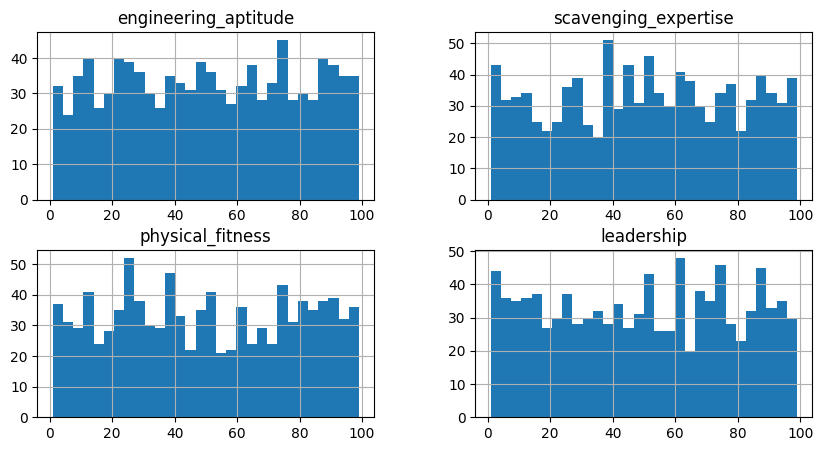

In [ ]:
df.hist(['engineering_aptitude','scavenging_expertise', 'physical_fitness', 'leadership'], bins=30, figsize=(10, 5))
plt.show()

### Scaling and Outliers

## Modeling and Evaluation

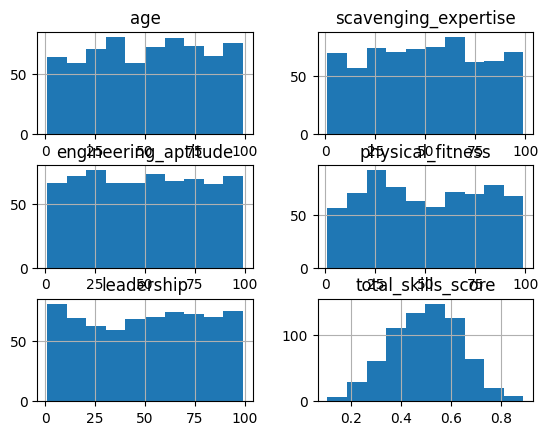

In [ ]:
from sklearn.model_selection import train_test_split

# X_train, X_test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('survives', axis=1), df['survives'], test_size=0.30)


X_train.hist()
plt.show()

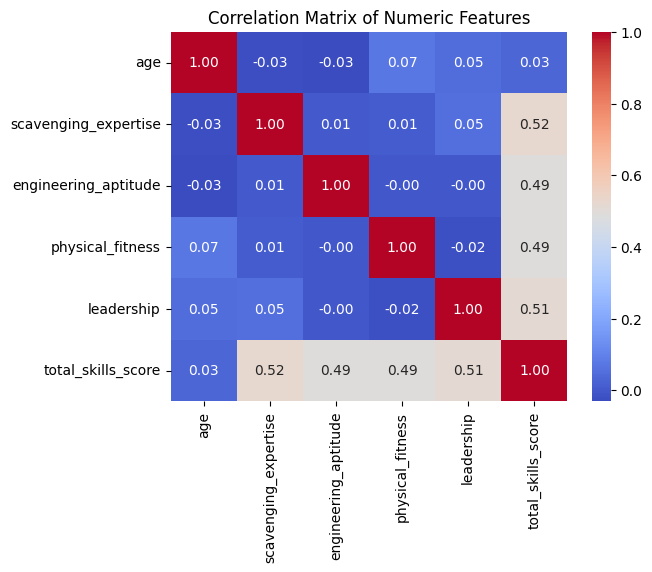

Survival Rates:
 survives
likely      0.508
unlikely    0.492
Name: proportion, dtype: float64


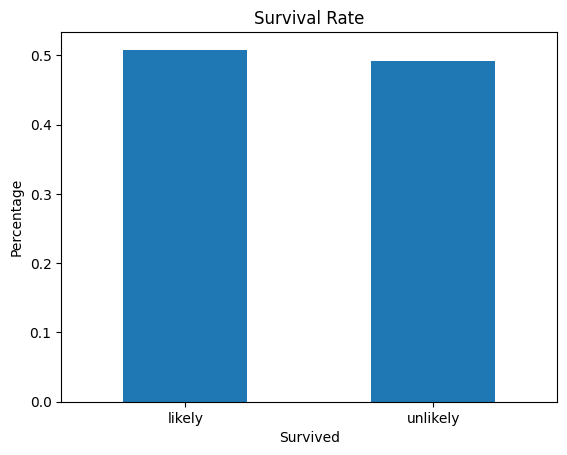

In [ ]:
# Select only the numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Survival Rate Analysis
survival_rates = df['survives'].value_counts(normalize=True)
print("Survival Rates:\n", survival_rates)
survival_rates.plot(kind='bar')
plt.title('Survival Rate')
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

### Logistic Regression

### Confusion Matrix

In [ ]:
import numpy as np
import pandas as pd
from faker import Faker
from sklearn.ensemble import RandomForestClassifier

fake = Faker()

# ... (rest of your code generating population_data)

# Separate features (X) and target variable (y)
X = population_data[['sex', 'age', 'scavenging_expertise', 'engineering_aptitude',
                       'physical_fitness', 'leadership', 'knowledge_of_ruins', 'current_location']]

# Convert categorical variables to numerical (optional for Random Forest)
X = pd.get_dummies(X, columns=['sex', 'knowledge_of_ruins', 'current_location'])  # One-hot encoding

y = population_data['survives']  # Target variable

# Split data into training and testing sets (optional for model evaluation)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust parameters as needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data (optional for model evaluation)
y_pred = model.predict(X_test)

# Evaluate model performance (optional)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9250


In [ ]:

import numpy as np
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.925
Confusion Matrix:
 [[97  7]
 [ 8 88]]
Classification Report:
               precision    recall  f1-score   support

      likely       0.92      0.93      0.93       104
    unlikely       0.93      0.92      0.92        96

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



Dataset shape: (1000, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   1000 non-null   object 
 1   age                   1000 non-null   int64  
 2   scavenging_expertise  1000 non-null   int64  
 3   engineering_aptitude  1000 non-null   int64  
 4   physical_fitness      1000 non-null   int64  
 5   leadership            1000 non-null   int64  
 6   knowledge_of_ruins    1000 non-null   object 
 7   current_location      1000 non-null   object 
 8   given_name            1000 non-null   object 
 9   surname               1000 non-null   object 
 10  total_skills_score    1000 non-null   float64
 11  survives              1000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 101.6+ KB
Dataset info: None
Confusion Matrix:
[[97  7]
 [ 8 88]]


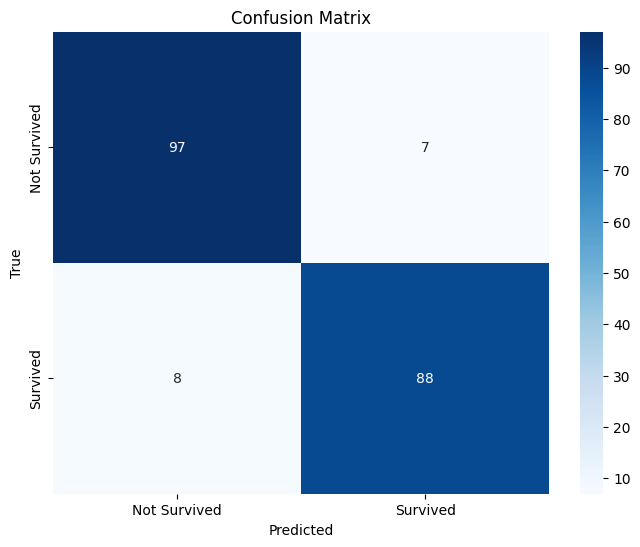

In [ ]:


# Save the results to a CSV file
df.to_csv('my_data_science_fiction_story.csv')

print("Dataset shape:", df.shape)
print("Dataset info:", df.info())

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      likely       0.92      0.93      0.93       104
    unlikely       0.93      0.92      0.92        96

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200

